## 2024 07/10 Colorspace Analysis

*Last Updated*: 2024-07-10

### Authors
* Nicole Tin


### Overview
This Jupyter notebook is intended to explore how non-RGB representations of the image may abstract out or highlight features in the image. Luminance is known to be an environmental confounder that can skew results, and is nonnormalized in RGB. Other representations, such as HSV or CIELAB may better represent skin by removing luminance and highlighting yellow/redness [1]. The goal of this notebook is to explore color spaces that represent skin for downstream featurization.
 

### Key Results

- Grayscale image is not the same as the grayscale representations in H(S)V or CIELA(B). B is grainy, though it may be just binning colors and S (saturation) highlights different hand regions. 

- ...


#### Citations 
[1] Jacobs, Leonie & Wollstein, Andreas & Lao, Oscar & Hofman, Albert & Klaver, Caroline & Uitterlinden, André & Nijsten, Tamar & Kayser, Manfred & Liu, Fan. (2012). Comprehensive candidate gene study highlights UGT1A and BNC2 as new genes determining continuous skin color variation in Europeans. Human genetics. 132. 10.1007/s00439-012-1232-9. 

In [1]:
# --- Imports
import os
import cv2
import pandas as pd
from dermaml import features

from pycaret import regression


# from dermaml import data
# import PIL
# from PIL import Image
# import numpy as np
# import mlflow # creates error
import matplotlib.pyplot as plt
# import skimage


In [2]:
# Dataset
dataset_name = "11khands"

# AutoML
experiment_name = "11khands-automl-sample-test_NT"
num_best_models = 5
random_seed = 42

# Paths
root = '/Users/nicole/Documents/GitHub/DermaML'
image_folder = '/data/source/Hands/'
csv_file = '/data/source/HandInfo.csv'

In [3]:
# -- Read the CSV file
df = pd.read_csv(root+ csv_file)
dorsals = df.loc[df['aspectOfHand'] == 'dorsal right']
dorsals = dorsals.drop_duplicates(subset=['id'])
dorsals = dorsals.groupby('skinColor').tail(3)

In [4]:
# -- Images

def read_local(image_fnames, image_dir):
    images = []
    for filename in image_fnames:
        img = cv2.imread(os.path.join(image_dir, filename))
        if (img is not None) & (len(img.shape) > 2):
            images.append(img)
    return images

# ds = hub.load('hub://activeloop/11k-hands')
# images = ds.images

image_fnames = dorsals.loc[:, 'imageName']
images = read_local(image_fnames, root+image_folder)

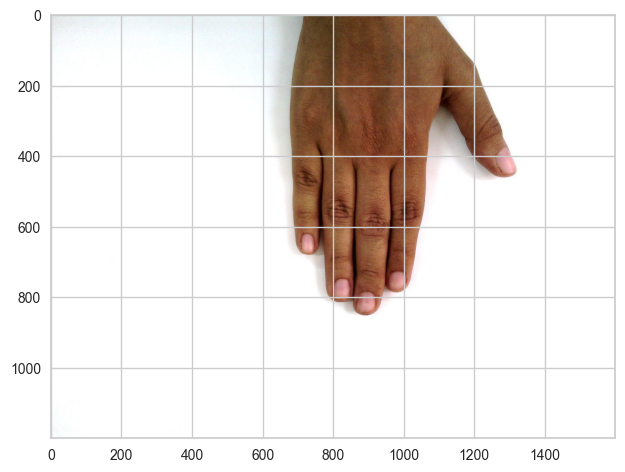

In [5]:
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))

In [6]:
# -- Image preprocessing

# for i, im in enumerate(removed_ims):
#     # Convert BGRA image to RBGA
#     grayscale_im = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)

In [7]:
import rembg
import numpy as np

def remove_background(image: np.ndarray) -> np.ndarray:
    """
    Remove background from `image`.

    Paramerers
    ___________
    image: image data

    Return value
    ____________
    output: Numpy array containing image with background removed
    """
    # --- Check arguments

    if not isinstance(image, (np.ndarray)):
        raise TypeError(
            "`image` must be of type `np.ndarray`. "
            + f"(type(image)={type(image)}"
        )

    # --- Remove background
    #
    # Note: the return type of rembg.remove() is the same as the type of `image`
    cutout = rembg.remove(image)

    # Return numpy array representation of image with background removed
    if isinstance(cutout, np.ndarray):
        output = cutout

    else:
        print('Not sure how you got here')

    return output

iso_images = [remove_background(im) for im in images]

### Color Space Analysis

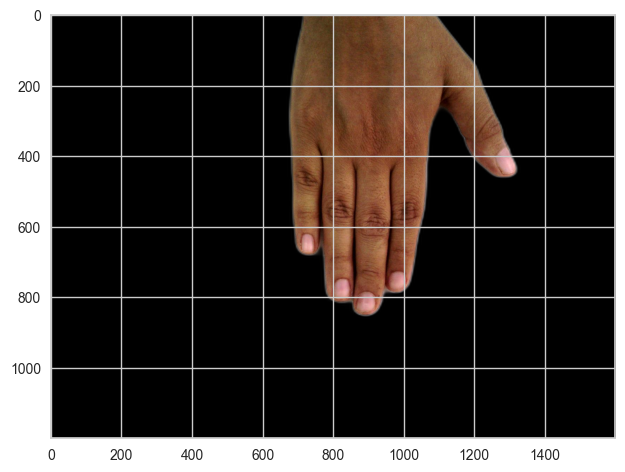

In [ ]:
plt.imshow(cv2.cvtColor(iso_images[2], cv2.COLOR_BGR2RGB))

Grayscale

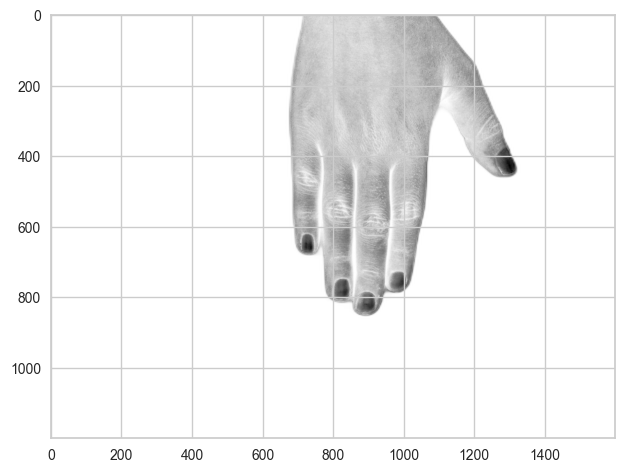

In [ ]:
plt.imshow(cv2.cvtColor(iso_images[2], cv2.COLOR_RGB2GRAY))

HSV

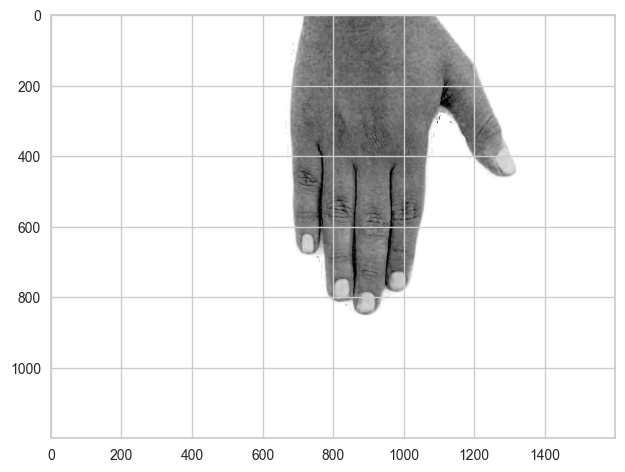

In [ ]:
plt.imshow(cv2.cvtColor(iso_images[2], cv2.COLOR_BGR2HSV)[:, :, 1])

CIELAB

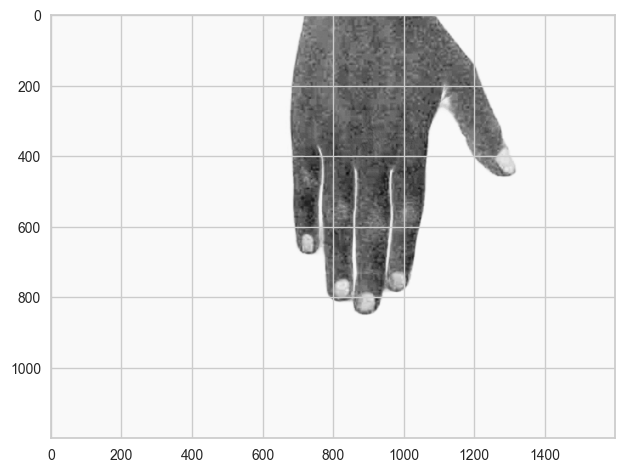

In [42]:
plt.imshow(cv2.cvtColor(iso_images[2], cv2.COLOR_BGR2LAB)[:, :, 2])